# CIFAR-10 Object Classification

The CIFAR-10 dataset contains 60k 32x32 pixel color images from 10 different classes.

The classes are:
- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck

Tasks:

- implement the TODOs
- train a MLP to achieve >40% test accuracy
- add TensorBoard summaries
- train a CNN to achieve >80% test accuracy

Help:
- use the TensorFlow API Documentation [https://www.tensorflow.org/api_docs/](https://www.tensorflow.org/api_docs/)

<hr>

# Download data

In [2]:
%%sh
# download CIFAR-10
wget -q https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# unpack
tar xzf cifar-10-python.tar.gz
# remove tar.gz
rm cifar-10-python.tar.gz

# Imports

In [1]:
import tensorflow as tf
import numpy as np
import pickle

# Preparations

In [2]:
# function to unpickle data files
def unpickle(file):
    with open(file, 'rb') as fo:
        obj = pickle.load(fo, encoding='bytes')
    return obj

# function to store  data in pickle file
def store(obj, filename):
    pickle.dump(obj, open('cifar-10-batches-py/' + filename, 'wb'))

In [3]:
x_train_b = unpickle('cifar-10-batches-py/data_batch_' + str(1)).get(bytes('data', 'ascii'))
img = x_train_b[1]
print(img.shape)
r = img[0:1024]
g = img[1024:2048]
b = img[2048:3072]
print(r.shape)
print(g.shape)
print(b.shape)
rgb = np.dstack((r,g,b))


(3072,)
(1024,)
(1024,)
(1024,)


In [4]:
# TODO: decode pickle data as images
# see https://www.cs.toronto.edu/~kriz/cifar.html
def decode_as_image(img_flat):
    img_R = img_flat[0:1024]
    img_G = img_flat[1024:2048]
    img_B = img_flat[2048:3072]
    return np.dstack((img_R, img_G, img_B))

In [5]:
# load train data and save to disk for later usage
# note: you might need to give Docker more memory
# alternatively, execute separately
x_train = []
for i in range(1, 6):
    x_train_b = unpickle('cifar-10-batches-py/data_batch_' + str(i)).get(bytes('data', 'ascii'))
    for img in x_train_b:
        img = decode_as_image(img)
        x_train.append(img)

# reshape the data
x_train = np.array(x_train).reshape(5*10000, 32*32, 3)

# save to disk
store(x_train, 'x_train')

In [6]:
# load test data and save to disk for later usage
x_test = []
x_test_b = unpickle('cifar-10-batches-py/test_batch').get(bytes('data', 'ascii'))
for img in x_test_b:
    img = decode_as_image(img)
    x_test.append(img)

# reshape the data
x_test = np.array(x_test).reshape(1*10000, 32*32, 3)

# save to disk
store(x_test, 'x_test')

In [9]:
# load train labels and save to disk
y_train = []
for i in range(1, 6):
    y_train_b = unpickle('cifar-10-batches-py/data_batch_' + str(i)).get(bytes('labels', 'ascii'))
    for img in y_train_b:
        y_train.append(img)
        
# reshape the data
y_train = np.array(y_train).flatten()

# save to disk
store(y_train, 'y_train')

In [10]:
# load test labels and save to disk
y_test = []
y_test_b = unpickle('cifar-10-batches-py/test_batch').get(bytes('labels', 'ascii'))
for img in y_test_b:
    y_test.append(img)
        
# reshape the data
y_test = np.array(y_test).flatten()

# save to disk
store(y_test, 'y_test')

# Load prepared data

In [38]:
x_train = unpickle("cifar-10-batches-py/x_train")
x_test = unpickle("cifar-10-batches-py/x_test")
y_train = unpickle("cifar-10-batches-py/y_train")
y_test = unpickle("cifar-10-batches-py/y_test")

In [39]:
# mapping from label number to label
label_mapping = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def get_label(i):
    return label_mapping[i]

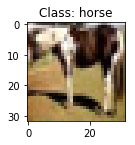

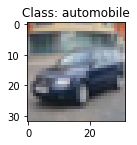

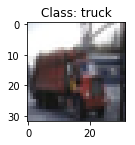

In [40]:
# plots the first 3 entries in the train set
import matplotlib.pyplot as plt

rand = np.random.randint(50000 - 1)
i = 0
for idx in range(rand, rand + 3):
    plt.subplot(1, 3, i + 1)
    plt.title("Class: {}".format(get_label(int(y_train[idx]))))
    plt.imshow(x_train[idx].reshape(32,32,3))
    i += 1
    plt.show()

In [41]:
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

In [42]:
# TODO: normalize data and cast to float32
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
print(x_train.shape)

(50000, 3072)


# Defining the inputs

In [43]:
# TODO: define network parameters
n_input = 3072 # image shape
n_channels = 3 # number of channels
n_classes = 10 # number of CIFAR-10 classes

In [44]:
# one hot encoding of labels
def one_hot_encode(a, length):
    temp = np.zeros((a.shape[0], length))
    temp[np.arange(a.shape[0]), a] = 1
    return temp

print(y_train)
y_train = one_hot_encode(y_train.astype(np.int), n_classes)
y_test = one_hot_encode(y_test, n_classes)

[6 9 9 ... 9 1 1]


In [79]:
# TODO: define placeholder
x = tf.placeholder(tf.float32, [None, n_input], "x")
y = tf.placeholder(tf.float32, [None, n_classes], "y")

In [80]:
# TODO: define hyper parameters
learning_rate = 0.0001
training_iters = 1000000
batch_size = 256
display_step = 100

Check [this](https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c) tutorial for the CNN

In [81]:
def mlp(x):
    # TODO: define MLP
    flatten = tf.layers.flatten(x)
    hidden1 = tf.layers.dense(inputs=flatten, units=255, activation=tf.nn.relu)
    dropout = tf.layers.dropout(inputs=hidden1, rate=0.4)
    hidden2 = tf.layers.dense(inputs=dropout, units=255, activation=tf.nn.relu)
    pred = tf.layers.dense(hidden2, 10, activation=tf.nn.softmax)
    
    return pred

def cnn(x):
    # TODO: define CNN
    x = tf.reshape(x, [-1, 32,32,3])
    conv1 = tf.layers.conv2d(inputs=x, filters=32, kernel_size=[5,5], data_format="channels_last", activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=(3,3), strides=1)
    flatten = tf.layers.flatten(inputs=pool1)
    pred = tf.layers.dense(flatten, 10, activation=tf.nn.softmax)

    return pred

In [82]:
# build network
#pred = mlp(x)
pred = cnn(x)

# define cost function and optimizer
cost = tf.reduce_mean(tf.losses.softmax_cross_entropy(y, pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# TODO: define tensorboard summaries
#ith tf.name_scope('performance'):
#   tf_loss_ph = tf.placeholder(tf.float32,shape=None,name='loss_summary')
#   tf.summary.scalar('loss', tf_loss_ph)
#  tf_accuracy_ph = tf.placeholder(tf.float32,shape=None, name='accuracy_summary')
#   tf_accuracy_summary = tf.summary.scalar('accuracy', tf_accuracy_ph)

train_acc = tf.summary.scalar('accuracy', accuracy)
train_cost = tf.summary.scalar('cost', cost)

merged = tf.summary.merge_all() # merges train acc and cost summaries

test_acc = tf.summary.scalar('accuracy_test', accuracy)

# Train and evaluate

In [83]:
# initializing the variables
init = tf.global_variables_initializer()

progbar = tf.keras.utils.Progbar(training_iters, stateful_metrics=["loss", "acc"])

with tf.Session() as sess:
    sess.run(init)
    train_writer = tf.summary.FileWriter('tf-summary/train', sess.graph)
    test_writer = tf.summary.FileWriter('tf-summary/test')
    step = 1
    
    # training loop
    while step * batch_size < training_iters:
        indices = np.random.randint(x_train.shape[0], size=batch_size)
        batch_x = x_train[indices]
        batch_y = y_train[indices]
        # run optimization op (backprop)
        if step % display_step == 0:
            #print("Step:", step)
            # calculate train batch loss and accuracy
            loss, acc, summary = sess.run([cost, accuracy, merged], feed_dict={x: batch_x, y: batch_y})
            #loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
            train_writer.add_summary(summary, step*batch_size)
            
            progbar.update(step*batch_size, values=[("loss", loss), ("acc", acc)])
            
            # TODO: calculate test accuracy of random test batch
            indices = np.random.randint(x_test.shape[0], size=batch_size)
            test_batch_x = x_test[indices]
            test_batch_y = y_test[indices]
            acc = sess.run(test_acc, feed_dict={x: test_batch_x, y: test_batch_y})
            test_writer.add_summary(acc, step*batch_size)
        else:
            #print("Step:", step)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        step += 1
    
    print("\n")
    print ("Optimization Finished!")
    
    # calculate accuracy for MNIST test images
    print ("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: x_test,
                                      y: y_test}))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,10]
	 [[node Placeholder_3 (defined at <ipython-input-45-1f8c4e0c607d>:3) ]]
	 [[node Mean_2 (defined at <ipython-input-22-9c90603e42ac>:6) ]]

Caused by op 'Placeholder_3', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/usr/local/lib/python3.5/dist-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2843, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2869, in _run_cell
    return runner(coro)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3044, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3209, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-1f8c4e0c607d>", line 3, in <module>
    y = tf.placeholder(tf.float32, [None, n_classes])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_3' with dtype float and shape [?,10]
	 [[node Placeholder_3 (defined at <ipython-input-45-1f8c4e0c607d>:3) ]]
	 [[node Mean_2 (defined at <ipython-input-22-9c90603e42ac>:6) ]]
